## AIDA Practical Quiz
By: Vallarta, Troy Joaquin G.

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
from scipy import stats


source = "https://github.com/Zofserif/aida2-practice/blob/master/datasets/netflix_titles.xlsx?raw=true"

<h2> DATASET READING </h2>

In [2]:
## 1. Read the dataset in xls file.
df = pd.read_excel(source)

In [3]:
## Getting the categorical data
# df5_dummy = pd.get_dummies(df5['listed_in'])
# df5_dummy = pd.concat([df5, df5_dummy], axis =1)
# df5_dummy.drop(["listed_in"], inplace=True, axis=1)
# df5_dummy = df5_dummy.groupby(df5_dummy['show_id']).aggregate("sum")
# df5_dummy

In [4]:
## 2. Clean the data if not yet cleaned.
df.isnull().sum()

duration_minutes    1969
duration_seasons    4265
type                   1
title                  1
date_added            13
release_year           2
rating                13
description            3
show_id                4
dtype: int64

##### The data is not cleaned.... 

<h2> DATA CLEANING </h2>

In [5]:
## 2. Clean the data if not yet cleaned.
netflix_df = df.copy()
netflix_df = df.dropna(subset=['duration_minutes'])
netflix_df.pop("duration_seasons")
nonum = netflix_df[pd.to_numeric(netflix_df['duration_minutes'], errors='coerce').isna()].index
netflix_df = netflix_df.drop(nonum)
netflix_df = netflix_df.astype({'duration_minutes':'int'})
netflix_df = netflix_df.dropna()
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_df.dtypes

duration_minutes      int64
type                 object
title                object
date_added           object
release_year        float64
rating               object
description          object
show_id             float64
year_added            int64
dtype: object

In [6]:
def val_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (netflix_df.apply(val_missing, axis=0)) 

#Applying per row:
print ("\nMissing values per row:")
print (netflix_df.apply(val_missing, axis=1).head(10)) 

Missing values per column:
duration_minutes    0
type                0
title               0
date_added          0
release_year        0
rating              0
description         0
show_id             0
year_added          0
dtype: int64

Missing values per row:
0     0
1     0
4     0
6     0
7     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


<h4> Now that the data is cleaned </h4>

In [7]:
## 3.  Create a python program that will show the descriptive analysis of the datasets ( Count, min, max, standard deviation, 75%,50%and 25%)
netflix_df.describe().iloc[:,[0,1,3]]

,duration_minutes,release_year,year_added
count,4255.000000,4255.000000,4255.000000
mean,99.173208,2012.364747,2017.995770
std,28.047928,9.689053,1.202951
min,3.000000,1942.000000,2008.000000
25%,86.000000,2012.000000,2017.000000
50%,98.000000,2016.000000,2018.000000
75%,115.000000,2017.000000,2019.000000
max,312.000000,2020.000000,2020.000000


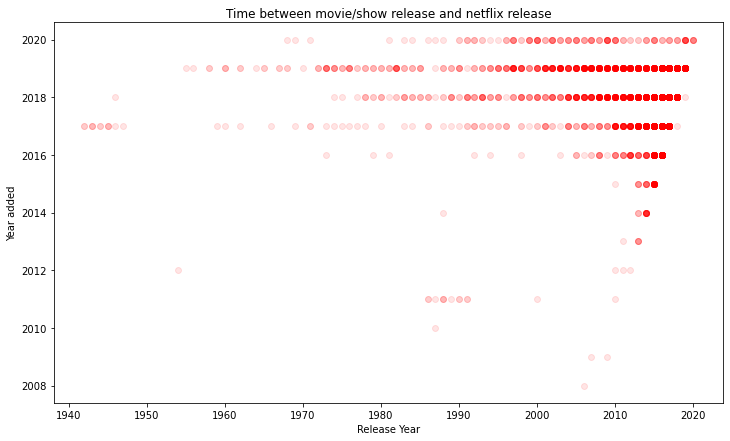

In [8]:
x=netflix_df["release_year"]
y=netflix_df["year_added"]
plt.figure(figsize=(12,7))
plt.scatter(x,y,alpha=0.1,c='r')
plt.title("Time between movie/show release and netflix release")
plt.xlabel("Release Year")
plt.ylabel("Year added");

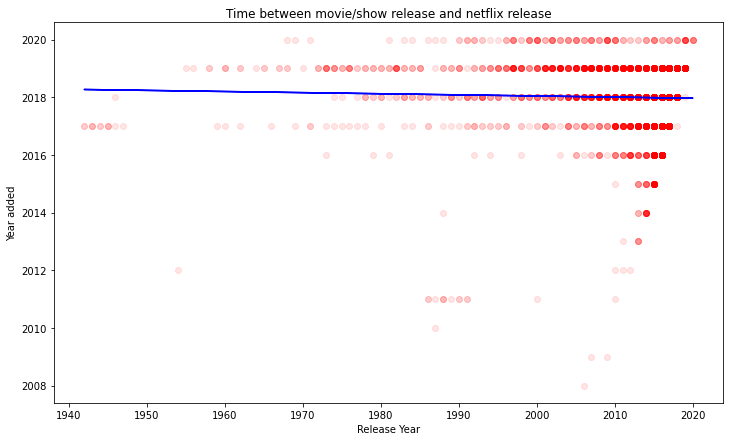

In [9]:
## 5. Create a python program that will plot and show the regression line and regression coefficient.
slope, intercept, r, p, std_err = stats.linregress(x, y)

def regression(x):
  return slope * x + intercept

mymodel = list(map(regression, x))

plt.figure(figsize=(12,7))
plt.scatter(x,y,alpha=0.1,c='r')
plt.plot(x,mymodel,color="blue")
plt.title("Time between movie/show release and netflix release")
plt.xlabel("Release Year")
plt.ylabel("Year added");

In [10]:
def find_cor(X,y):
    ## Finding the mean of X and y
    x_bar = X.mean()
    y_bar = y.mean()

    ## get the difference for each data point from their means
    sst_x = X-x_bar
    sst_y = y-y_bar

    ## Finding the covariance of X and y
    cov_xy = np.cov(X,y, bias=True)[0,1]

    ## Finding the standard deviation of X and y
    std_X = np.std(X)
    std_y = np.std(y)

    ## Finding the correlation
    R = cov_xy /(std_X*std_y)
    return R

print(f'The ression coefficient is {find_cor(x,y)}. Therefore There are almost no correlation with each other leaning towards negative correlation slightly')

The ression coefficient is -0.031229582173478043. Therefore There are almost no correlation with each other leaning towards negative correlation slightly


The reason why the correaltion is slightly negative is that some of the shows are added in netflix library is late because of licensing and other acquisition. There are also movies & shows that are in the library older than the creation of Netflix which is 1997.

In [19]:
## 6. Create a python code to predict future values. Is linear regression the appropriate method to use to predict future values? Why?
ts=netflix_df.copy()
ts_show=ts.groupby(pd.Grouper(key='date_added', axis=0, freq='M'))["show_id"].count()
ts_show=ts_show.to_frame()
ts_show = ts_show.rename({"show_id": "value"} , axis = 1)
ts_show

,value
date_added,
2008-01-31,1
2008-02-29,0
2008-03-31,0
2008-04-30,0
2008-05-31,0
...,...
2019-09-30,96
2019-10-31,136
2019-11-30,205


In [20]:
## The data for prediction should start on the end of the dataset. This code block do that
start_date = '2014-1-1'
mask = (ts_show.index > start_date)
ts_show=ts_show.loc[mask]
ts_show

,value
date_added,
2014-01-31,2
2014-02-28,1
2014-03-31,0
2014-04-30,1
2014-05-31,0
...,...
2019-09-30,96
2019-10-31,136
2019-11-30,205


In [21]:
## Splitting into training and testing
train = ts_show[:90]
test = ts_show[50:]

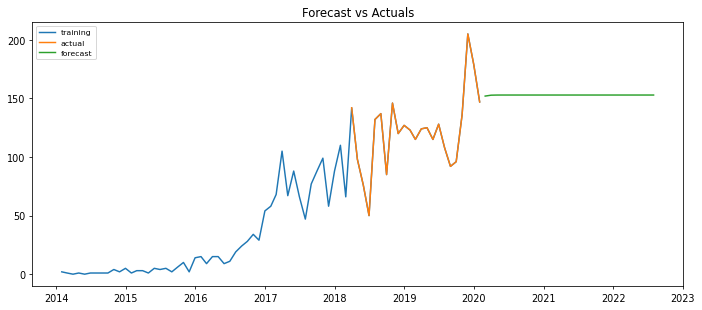

In [22]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(1,1,1))  
fitted = model.fit()  

# Forecast
fc= fitted.forecast(steps=30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(12,5), dpi=70)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

At the question 5, the researcher used a linear regression in showing what is the overall data for this dataset. In the question 6 it only strengthen the values even more by creating a predicting past over the value given dataset. It is shown that the correlation would be at almost zero and the date of adding to the library and published date is not correlated to each other. What I think as an educated guess is that Netflix will only buy the licensing of the shows & movies when it makes them more revenue. I think that the researchers would want to know the revenue of each shows and the added added date would be have a larger correlation because at the end of the day Netflix is a business and they want revenue for their services.